In [7]:
#import Required library.......
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#loading Dataset.........
mydata=pd.read_csv(r'C:\Users\MUNMUN\Desktop\concreate_strength_prediction_project\Mechine_learning\Concrete_Data.csv')

In [8]:
mydata.shape

(1030, 9)

In [9]:
#Describe First five Element......
mydata.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
# Rename all features
mydata.columns=['cement','blastFarnase','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggreate','Age','strength']
mydata.head()

,cement,blastFarnase,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggreate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
mydata.isnull().sum()

cement              0
blastFarnase        0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggreate        0
Age                 0
strength            0
dtype: int64

In [12]:
mydata.duplicated().sum()

25

In [13]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   blastFarnase      1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggreate      1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [14]:
mydata.describe()

,cement,blastFarnase,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggreate,Age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [16]:
mydata.isnull().sum()/mydata.shape[0]*100

cement              0.0
blastFarnase        0.0
FlyAsh              0.0
Water               0.0
Superplasticizer    0.0
CoarseAggregate     0.0
FineAggreate        0.0
Age                 0.0
strength            0.0
dtype: float64

In [17]:
corr=mydata.corr()
corr

,cement,blastFarnase,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggreate,Age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blastFarnase,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FlyAsh,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggreate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


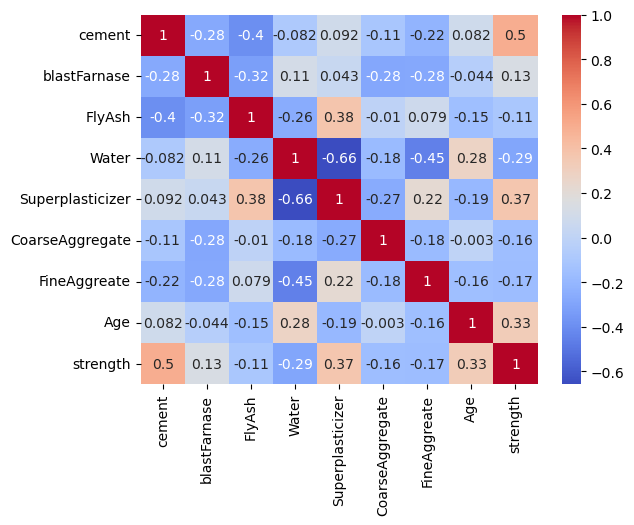

In [18]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.show()

In [19]:
X=mydata.drop('strength',axis=1)
Y=mydata['strength']
print(type(X),X.shape)
print(type(Y),Y.shape)
Y


<class 'pandas.core.frame.DataFrame'> (1030, 8)
<class 'pandas.core.series.Series'> (1030,)


0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: strength, Length: 1030, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_test.shape


(206, 8)

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_test.shape
print('shape of X_train =',X_train.shape)
print('shape of Y_train =',Y_train.shape)
print('shape of X_test =',X_test.shape)
print('shape of Y_test =',Y_test.shape)

shape of X_train = (824, 8)
shape of Y_train = (824,)
shape of X_test = (206, 8)
shape of Y_test = (206,)


C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\1282202454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


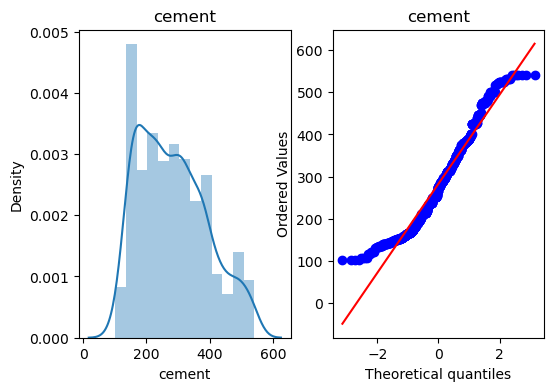

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\1282202454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


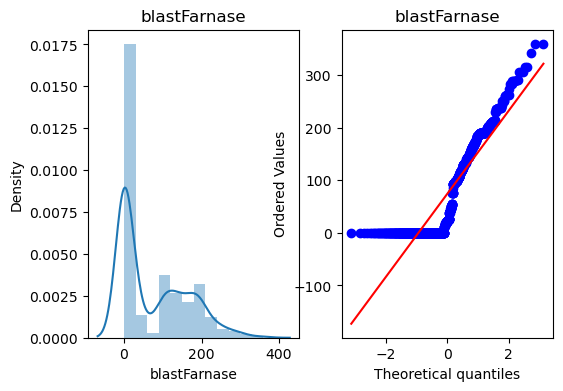

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\1282202454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


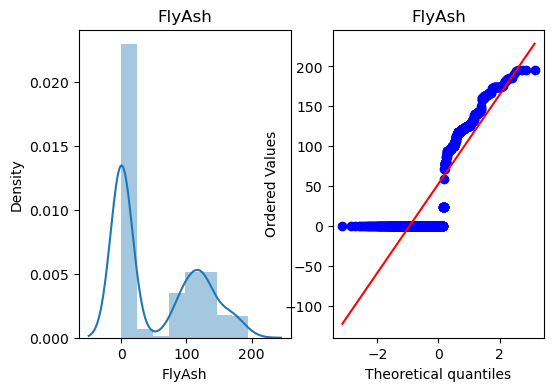

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\1282202454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


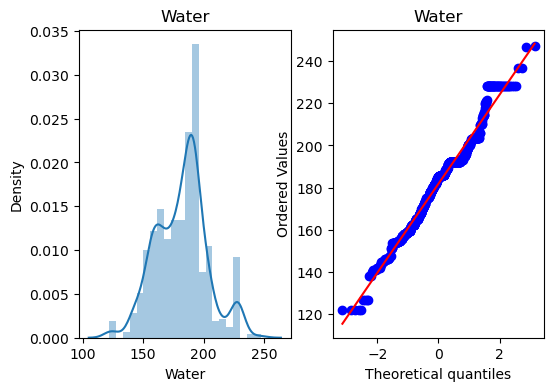

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\1282202454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


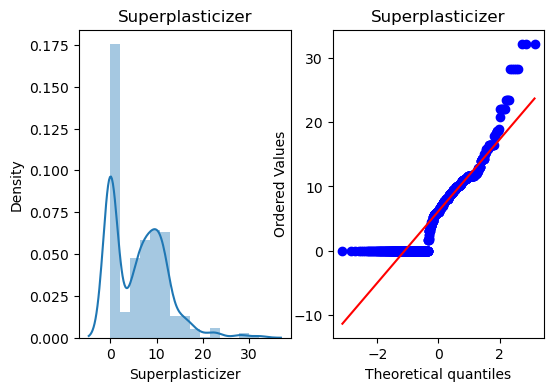

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\1282202454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


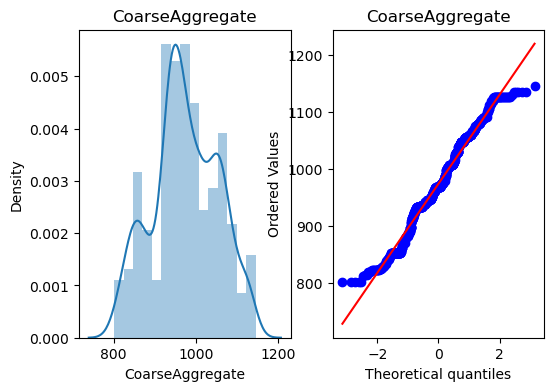

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\1282202454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


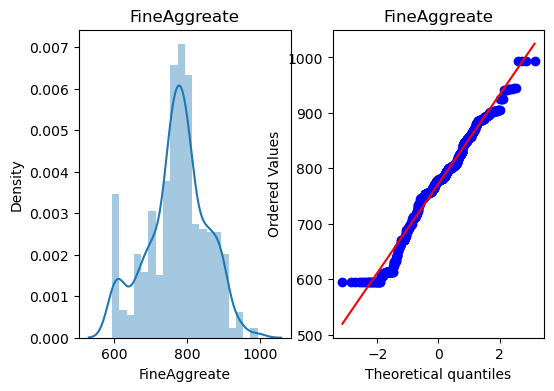

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\1282202454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


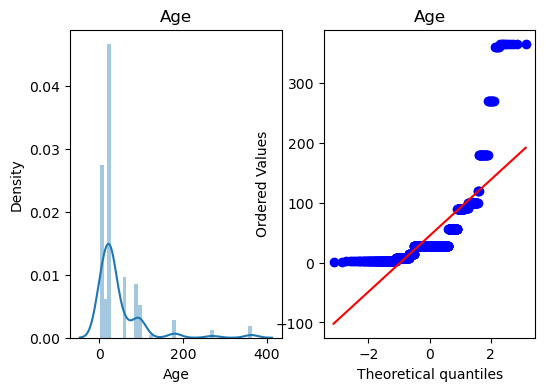

In [23]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

for col in X_train.columns:
  plt.figure(figsize=(6,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)



  plt.subplot(122)
  stats.probplot(X_train[col],dist='norm',plot=plt)
  plt.title(col)
  plt.show()

In [24]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [25]:
X_train_transformed=pt.fit_transform(X_train)
X_test_transformed=pt.transform(X_test)
X_test_transformed.shape

(206, 8)

In [26]:
type(X_train_transformed)

numpy.ndarray

In [27]:
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)

In [28]:
type(X_train_transformed)

pandas.core.frame.DataFrame

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


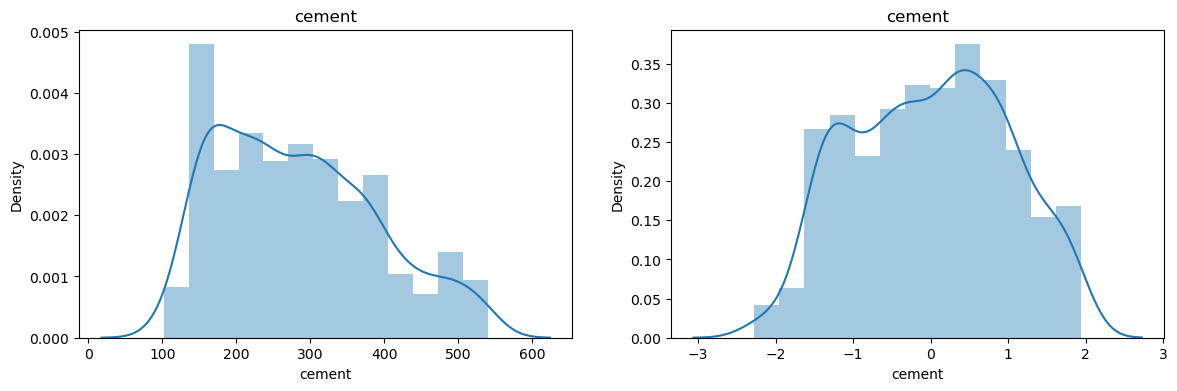

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


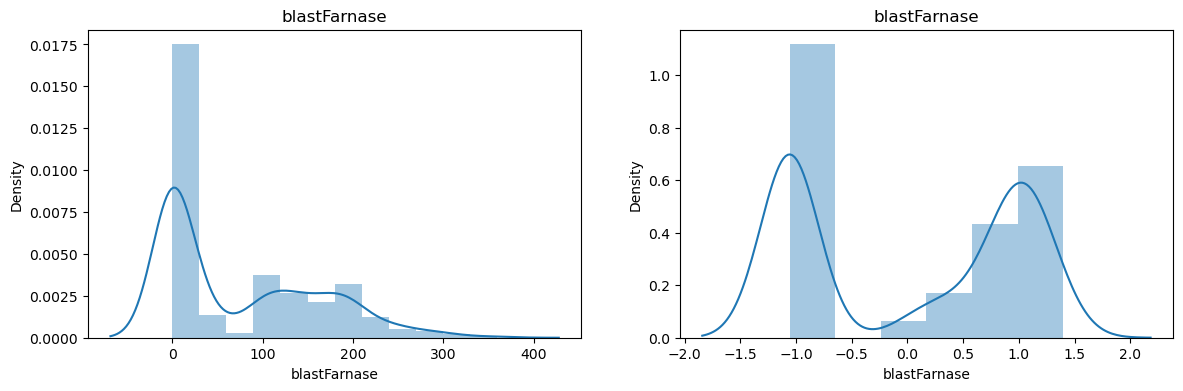

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


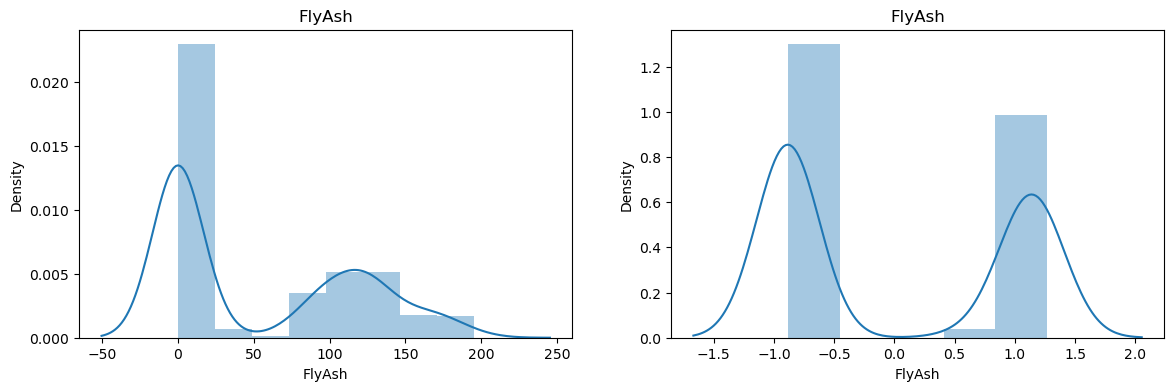

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


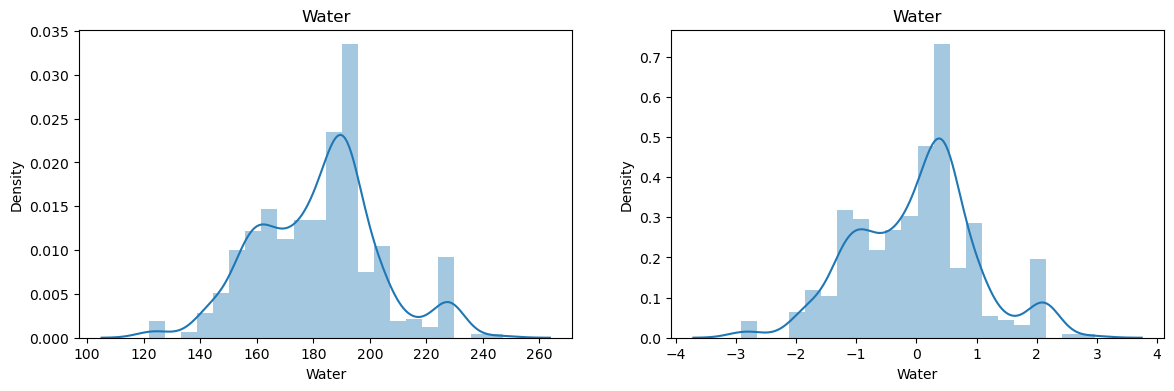

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


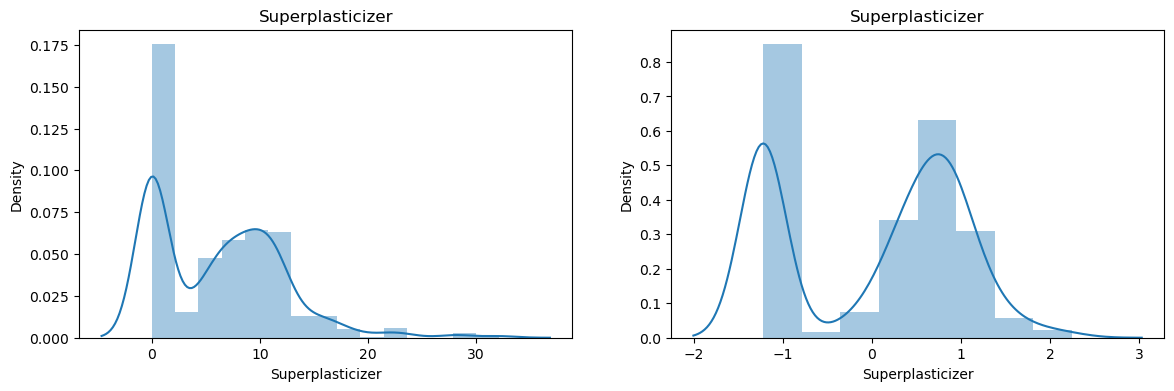

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


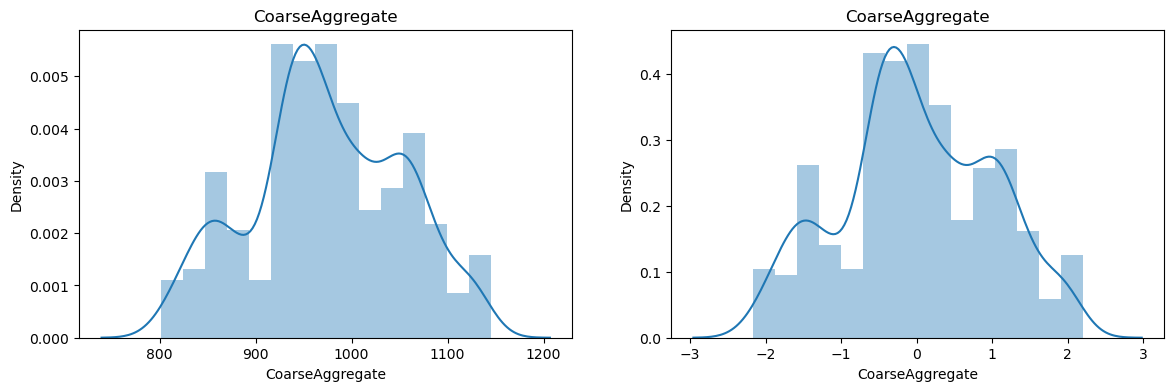

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


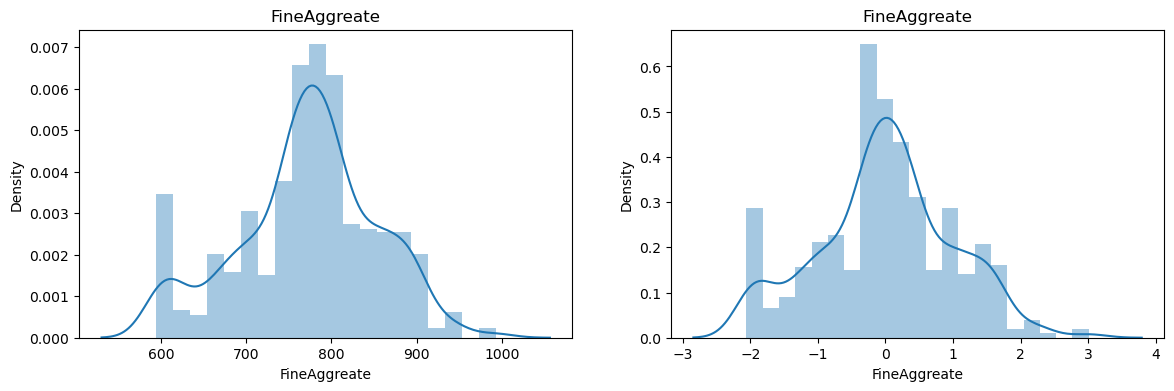

C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_20220\3905389743.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


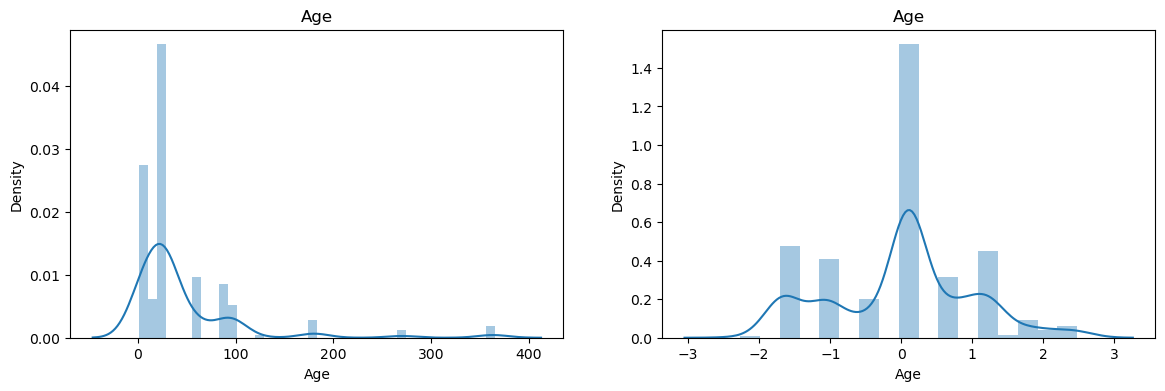

In [29]:
for col in X_train_transformed.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(X_train[col])
  plt.title(col)



  plt.subplot(122)
  sns.distplot(X_train_transformed[col])
  plt.title(col)
  plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
#It is used for to fit the model.................................
X_train_transformed=scaler.fit_transform(X_train_transformed)
X_test_transformed=scaler.transform(X_test_transformed)

c:\Users\MUNMUN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Axes: >

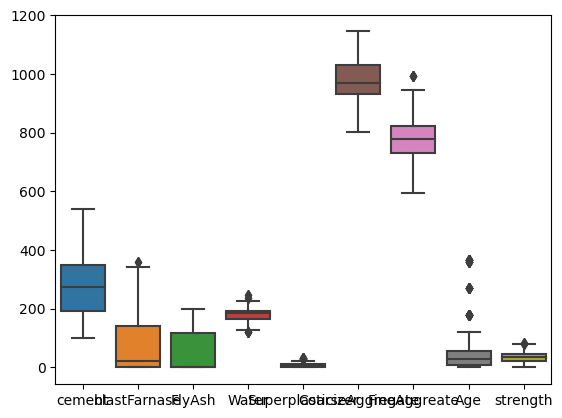

In [33]:
#......Outlier & Boxplot.......#

sns.boxplot(mydata)


In [34]:
df1 = mydata.select_dtypes(include=['int64', 'float64']).columns
print(df1)


Index(['cement', 'blastFarnase', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggreate', 'Age', 'strength'],
      dtype='object')


<Axes: xlabel='cement'>

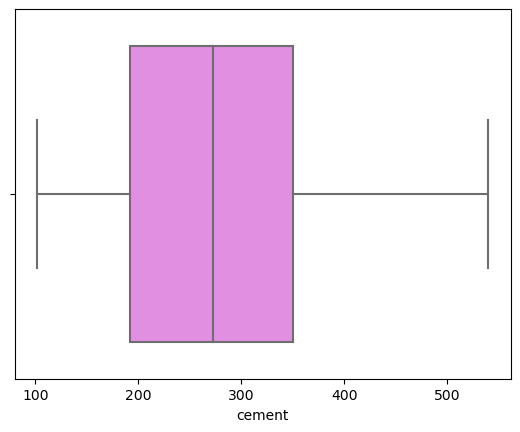

In [40]:
sns.boxplot(x=mydata["cement"],color="violet")

<Axes: xlabel='blastFarnase'>

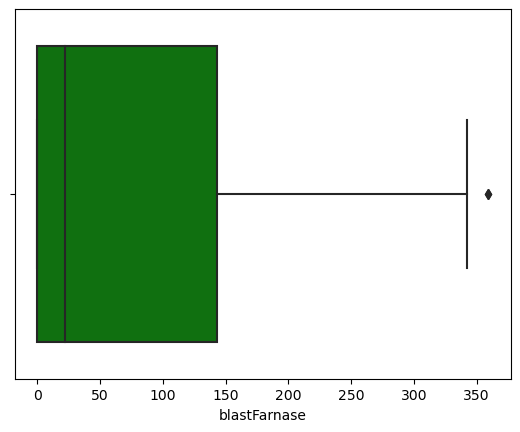

In [41]:
sns.boxplot(x=mydata["blastFarnase"],color="green")

<Axes: xlabel='FlyAsh'>

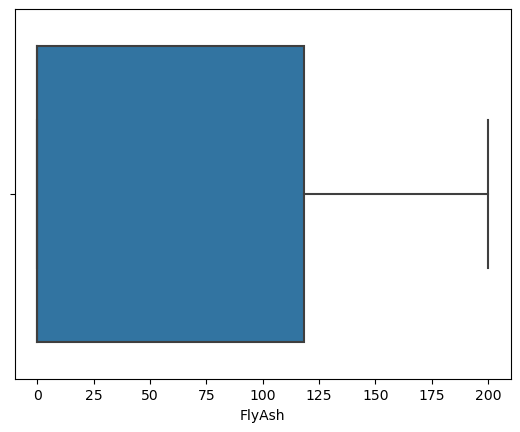

In [42]:
sns.boxplot(x=mydata["FlyAsh"])

<Axes: xlabel='Water'>

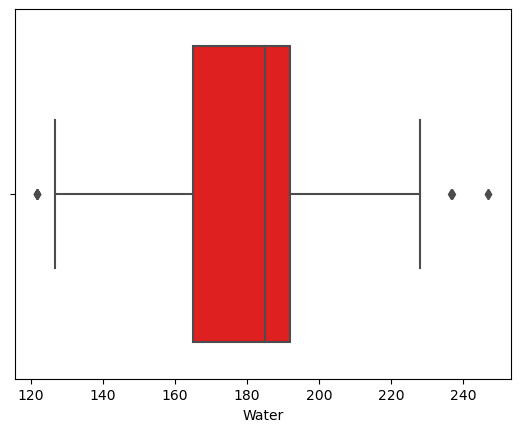

In [43]:
sns.boxplot(x=mydata["Water"],color="Red")

<Axes: xlabel='Superplasticizer'>

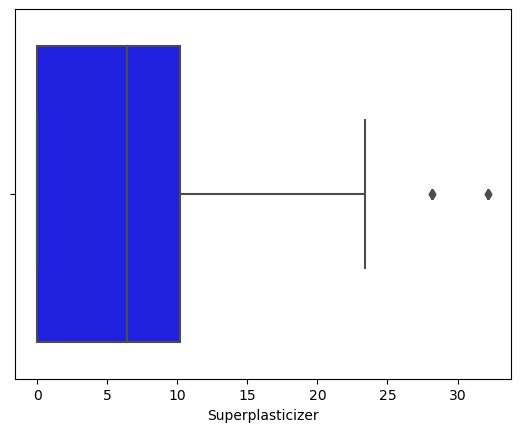

In [45]:
sns.boxplot(x=mydata["Superplasticizer"],color="Blue")

<Axes: xlabel='CoarseAggregate'>

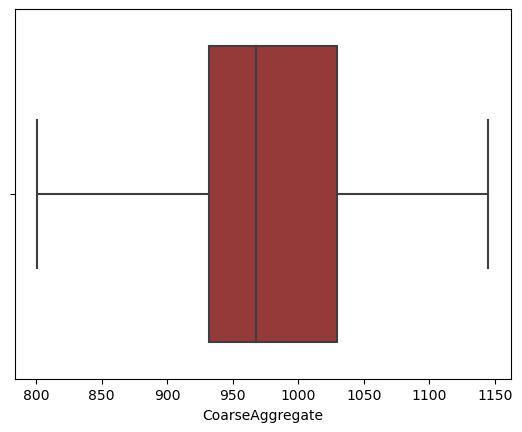

In [48]:
sns.boxplot(x=mydata["CoarseAggregate"],color="brown")

<Axes: xlabel='FineAggreate'>

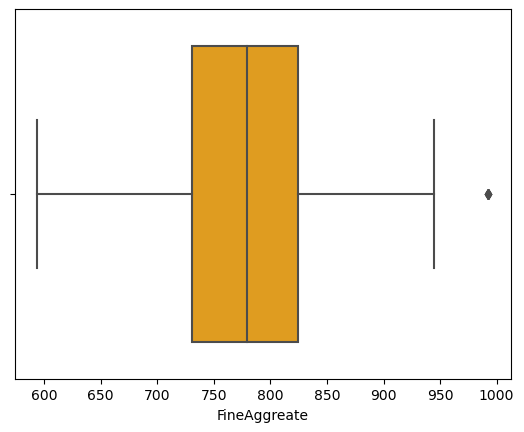

In [50]:
sns.boxplot(x=mydata["FineAggreate"],color="orange")

<Axes: xlabel='Age'>

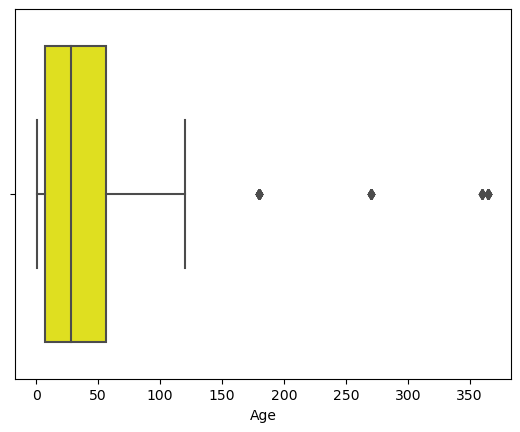

In [51]:
sns.boxplot(x=mydata["Age"],color="yellow")

<Axes: xlabel='Age', ylabel='FineAggreate'>

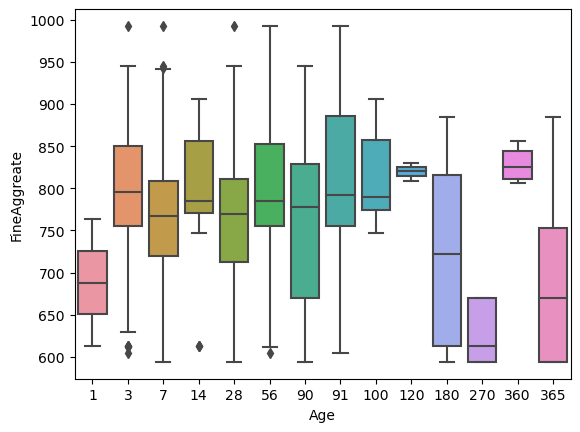

In [52]:
sns.boxplot(data=mydata, x="Age", y="FineAggreate")